In [1]:
from ultralytics import YOLO
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [4]:
# model = YOLO('yolov8n-cls.pt')
model = YOLO()

100%|█████████████████████████████████████████████████████████████████████████████| 5.30M/5.30M [00:00<00:00, 12.0MB/s]


In [8]:
from bs4 import BeautifulSoup
 
 
# Reading the data inside the xml
# file to a variable under the name 
# data
with open('RDD2022_Japan/Japan/train/annotations/xmls/Japan_000000.xml', 'r') as f:
    data = f.read()
 
# Passing the stored data inside
# the beautifulsoup parser, storing
# the returned object 
Bs_data = BeautifulSoup(data, "xml")

# Finding all instances of tag 
# `unique`
b_unique = Bs_data.find_all('object')

for member in root.findall('object'):
    bbx = member.find('bndbox')
    xmin = int(bbx.find('xmin').text)
    ymin = int(bbx.find('ymin').text)
    xmax = int(bbx.find('xmax').text)
    ymax = int(bbx.find('ymax').text)
    label = member.find('name').text

    value = (root.find('filename').text,
             int(root.find('size')[0].text),
             int(root.find('size')[1].text),
             label,
             xmin,
             ymin,
             xmax,
             ymax
             )

print(b_unique)

[<object>
<name>D20</name>
<pose>Unspecified</pose>
<truncated>1</truncated>
<difficult>0</difficult>
<bndbox>
<xmin>406</xmin>
<ymin>475</ymin>
<xmax>600</xmax>
<ymax>596</ymax>
</bndbox>
</object>, <object>
<name>D40</name>
<pose>Unspecified</pose>
<truncated>0</truncated>
<difficult>0</difficult>
<bndbox>
<xmin>409</xmin>
<ymin>373</ymin>
<xmax>598</xmax>
<ymax>472</ymax>
</bndbox>
</object>, <object>
<name>D10</name>
<pose>Unspecified</pose>
<truncated>0</truncated>
<difficult>0</difficult>
<bndbox>
<xmin>394</xmin>
<ymin>518</ymin>
<xmax>557</xmax>
<ymax>554</ymax>
</bndbox>
</object>, <object>
<name>D00</name>
<pose>Unspecified</pose>
<truncated>0</truncated>
<difficult>0</difficult>
<bndbox>
<xmin>510</xmin>
<ymin>454</ymin>
<xmax>560</xmax>
<ymax>542</ymax>
</bndbox>
</object>]


In [9]:
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            bbx = member.find('bndbox')
            xmin = int(bbx.find('xmin').text)
            ymin = int(bbx.find('ymin').text)
            xmax = int(bbx.find('xmax').text)
            ymax = int(bbx.find('ymax').text)
            label = member.find('name').text

            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     label,
                     xmin,
                     ymin,
                     xmax,
                     ymax
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height',
                   'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [10]:
# xml_to_csv('RDD2022_Japan/Japan/train/annotations/xmls')

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Japan_000000.jpg,600,600,D20,406,475,600,596
1,Japan_000000.jpg,600,600,D40,409,373,598,472
2,Japan_000000.jpg,600,600,D10,394,518,557,554
3,Japan_000000.jpg,600,600,D00,510,454,560,542
4,Japan_000001.jpg,600,600,D44,1,344,217,599
...,...,...,...,...,...,...,...,...
24749,Japan_013129.jpg,600,600,D00,195,446,225,491
24750,Japan_013131.jpg,600,600,D20,475,505,565,543
24751,Japan_013132.jpg,600,600,D00,542,275,600,336
24752,Japan_013132.jpg,600,600,D43,189,82,410,115


In [11]:
xml_df = xml_to_csv('RDD2022_Japan/Japan/train/annotations/xmls')
xml_df.to_csv('labels_{}.csv'.format('train'), index=None)
print('Successfully converted xml to csv.')

Successfully converted xml to csv.


In [12]:
annotations = pd.read_csv('labels_train.csv')
annotations['x'] = (((annotations['xmax'] - annotations['xmin']) / 2) + annotations['xmin']) / annotations['width']
annotations['y'] = (((annotations['ymax'] - annotations['ymin']) / 2) + annotations['ymin']) / annotations['height']
annotations['rel_width'] = (annotations['xmax'] - annotations['xmin']) / annotations['width']
annotations['rel_height'] = (annotations['ymax'] - annotations['ymin']) / annotations['height']
annotations['class_int'] = annotations['class'].str.replace('D', '').astype(int)

filenames = annotations.filename.unique()
# annotations#.groupby('filename')
for file in filenames:
    labels = annotations[annotations['filename'] == file]
    name = 'annotations/' + str(file).replace('.jpg', '.txt')
#     f = open(name, "w")
#     f.write(str(object.values)

    # object.to_csv(name, header=None, index=None, sep=' ', mode='a')
    np.savetxt(name, labels[['class_int', 'x', 'y', 'rel_width', 'rel_height']], fmt='%i %.6e %.6e %.6e %.6e')

    
  
    # for label in labels.index:
    #     # f.write((labels[['x', 'y', 'rel_width', 'rel_height']][label]))
    #     table = labels[['class', 'x', 'y', 'rel_width', 'rel_height']]
    #     print(table)
#     f.close()
        

annotations

,filename,width,height,class,xmin,ymin,xmax,ymax,x,y,rel_width,rel_height,class_int
0,Japan_000000.jpg,600,600,D20,406,475,600,596,0.838333,0.892500,0.323333,0.201667,20
1,Japan_000000.jpg,600,600,D40,409,373,598,472,0.839167,0.704167,0.315000,0.165000,40
2,Japan_000000.jpg,600,600,D10,394,518,557,554,0.792500,0.893333,0.271667,0.060000,10
3,Japan_000000.jpg,600,600,D00,510,454,560,542,0.891667,0.830000,0.083333,0.146667,0
4,Japan_000001.jpg,600,600,D44,1,344,217,599,0.181667,0.785833,0.360000,0.425000,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24749,Japan_013129.jpg,600,600,D00,195,446,225,491,0.350000,0.780833,0.050000,0.075000,0
24750,Japan_013131.jpg,600,600,D20,475,505,565,543,0.866667,0.873333,0.150000,0.063333,20
24751,Japan_013132.jpg,600,600,D00,542,275,600,336,0.951667,0.509167,0.096667,0.101667,0
24752,Japan_013132.jpg,600,600,D43,189,82,410,115,0.499167,0.164167,0.368333,0.055000,43


In [14]:
annotations['class_int'].unique()

array([20, 40, 10,  0, 44, 43, 50])

In [15]:
frequencies = annotations['class'].value_counts()#.plot(kind='hist')

frequencies

# !conda install --yes freetype=2.10.4

D20    6199
D00    4049
D44    3995
D10    3979
D50    3553
D40    2243
D43     736
Name: class, dtype: int64

<AxesSubplot:>

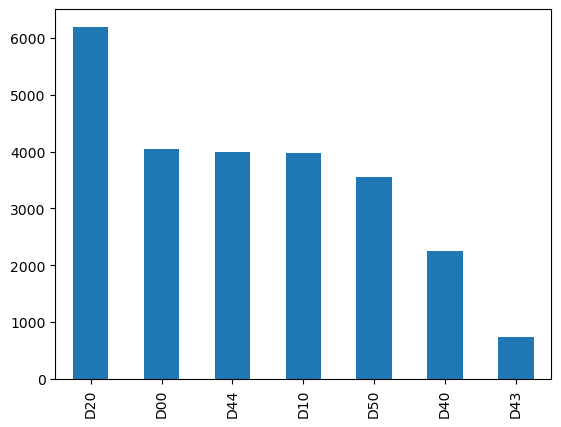

In [19]:
frequencies.plot(kind='bar')

### YOLO

In [10]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

# Use the model
results = model.train(data="config.yaml", epochs=3)  # train the model
# metrics = model.val()  # evaluate model performance on the validation set
# results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
# path = model.export(format="onnx")  # export the model to ONNX format

results


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

val: Scanning C:\Users\thoma\OneDrive - UvA\Master Information Studies - Data Science\Master Thesis\data\labels\validat
val: WARNING  C:\Users\thoma\OneDrive - UvA\Master Information Studies - Data Science\Master Thesis\data\images\validation\Japan_011854.jpg: ignoring corrupt image/label: Label class 40 exceeds dataset class count 4. Possible class labels are 0-3
val: WARNING  C:\Users\thoma\OneDrive - UvA\Master Information Studies - Data Science\Master Thesis\data\images\validation\Japan_011855.jpg: ignoring corrupt image/label: Label class 44 exceeds dataset class count 4. Possible class labels are 0-3
val: WARNING  C:\Users\thoma\OneDrive - UvA\Master Information Studies - Data Science\Master Thesis\data\images\validation\Japan_011857.jpg: ignoring corrupt image/label: Label class 44 exceeds dataset class count 4. Possible class labels are 0-3
val: WARNING  C:\Users\thoma\OneDrive - UvA\Master Information Studies - Data Science\Master Thesis\data\images\validation\Japan_011859.jpg

Plotting labels to runs\detect\train23\labels.jpg... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train23
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        1/3         0G      4.004      8.226      4.099          5        640: 100%|██████████| 81/81 [15:10<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:37<0
                   all        129         96   0.000227     0.0208   0.000174      4e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        2/3         0G      3.812      6.812      3.764          4        640: 100%|██████████| 81/81 [15:05<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP5